In [1]:
import os
import requests
import pandas as pd
import json
from api_keys import census_api_key
import matplotlib.pyplot as plt
import numpy as np


In [2]:
census_api_key


'a59744beaa4abf3257d003cdee1ec1b2cae7a57b'

In [3]:
#define years
years = [2019, 2020, 2021, 2022, 2023]
variables1 = ["B19013_001E", #median household income
              "B25077_001E", #median home value
              "B25064_001E" #median gross rent
              ]
#create list to hold all the data returned
all_data = []

for year in years:
    #Set the base URL
    url = f"http://api.census.gov/data/{year}/acs/acs5" 
    #Set the Params
    params = {
    "get" : f"NAME,{','.join(variables1)}",   #requests the county name and median household income
    "for" : "county:005,051,067",   #specific counties Clackamas, Multnomah, Washington
    "in" : "state:41",         #Oregon
    "key" : census_api_key
}


# Make the API request
    response = requests.get(url, params=params)
    census_data = response.json()
    for row in census_data[1:]:
        row_with_year = row + [year]
        all_data.append(row_with_year)
    print(json.dumps(all_data, indent=4))


[
    [
        "Washington County, Oregon",
        "82215",
        "386600",
        "1359",
        "41",
        "067",
        2019
    ],
    [
        "Clackamas County, Oregon",
        "80484",
        "395100",
        "1295",
        "41",
        "005",
        2019
    ],
    [
        "Multnomah County, Oregon",
        "69176",
        "386200",
        "1237",
        "41",
        "051",
        2019
    ]
]
[
    [
        "Washington County, Oregon",
        "82215",
        "386600",
        "1359",
        "41",
        "067",
        2019
    ],
    [
        "Clackamas County, Oregon",
        "80484",
        "395100",
        "1295",
        "41",
        "005",
        2019
    ],
    [
        "Multnomah County, Oregon",
        "69176",
        "386200",
        "1237",
        "41",
        "051",
        2019
    ],
    [
        "Clackamas County, Oregon",
        "82911",
        "421100",
        "1356",
        "41",
        "005",
        2020
    ],

In [4]:
column_header = census_data[0] + ["Year"]
column_header

['NAME',
 'B19013_001E',
 'B25077_001E',
 'B25064_001E',
 'state',
 'county',
 'Year']

In [5]:
rows = all_data[1]
rows

['Clackamas County, Oregon', '80484', '395100', '1295', '41', '005', 2019]

In [6]:
census_data_df = pd.DataFrame(all_data, columns=column_header)
census_data_df.head()


,NAME,B19013_001E,B25077_001E,B25064_001E,state,county,Year
0,"Washington County, Oregon",82215,386600,1359,41,067,2019
1,"Clackamas County, Oregon",80484,395100,1295,41,005,2019
2,"Multnomah County, Oregon",69176,386200,1237,41,051,2019
3,"Clackamas County, Oregon",82911,421100,1356,41,005,2020
4,"Multnomah County, Oregon",71425,410800,1309,41,051,2020


In [7]:
census_data_df = census_data_df.rename(columns={'NAME': 'County', 'B19013_001E': 'Median Household Income',  'B25077_001E': 'Median Home Value',
              'B25064_001E': 'Median Gross Rent', 'state': 'State Code', 'county': 'County Code'})
cleaned_median_income_df = census_data_df.drop(columns=["State Code", "County Code"])
cleaned_median_income_df


,County,Median Household Income,Median Home Value,Median Gross Rent,Year
0,"Washington County, Oregon",82215,386600,1359,2019
1,"Clackamas County, Oregon",80484,395100,1295,2019
2,"Multnomah County, Oregon",69176,386200,1237,2019
3,"Clackamas County, Oregon",82911,421100,1356,2020
4,"Multnomah County, Oregon",71425,410800,1309,2020
5,"Washington County, Oregon",86626,413500,1440,2020
6,"Clackamas County, Oregon",88517,452200,1447,2021
7,"Multnomah County, Oregon",76290,437600,1394,2021
8,"Washington County, Oregon",92025,439300,1541,2021
9,"Clackamas County, Oregon",95740,532200,1605,2022


In [8]:
#Export to CSV file
cleaned_median_income_df.to_csv("output_file/income_vs_home_rent.csv", index=False)


# Housing Costs

In [9]:
#Set Variables
cost_variables = [
    "B25088_001E",  # Total owner-occupied housing units
    "B25088_002E",  # Median monthly owner costs with a mortgage
    # "B25088_003E",  # Median monthly owner costs without a mortgage
    "B25087_005E",  # Owners spending 30%-34.9% of income on housing
    "B25070_007E",  # Renters spending 30%-34.9% of income on rent
    "B25091_017E",  # Owners spending 30%-34.9% of income on costs (with mortgage)
    "B25091_018E",  # Owners spending 35%+ of income on costs (with mortgage)
    "B25001_001E",  # Total Housing Units
    "B25002_002E",  # Occupied Units
    "B25002_003E",  # Vacant Units
    "B25003_002E",  # Owner-occupied Units
    "B25003_003E",  # Renter-occupied Units
    "B25070_010E",  # Renters spending 50%+ of income on rent
    "B25091_020E"  # Owners with a mortgage spending 50%+ of income on housing
    # "B25091_036E"   # Owners without a mortgage spending 50%+ of income on housing
]

years = [2019, 2020, 2021, 2022, 2023]
cost_list = []

#Loop through the years
for year in years:
    #Set the base URL
    url = f"http://api.census.gov/data/{year}/acs/acs5" 
    #Set the Params
    params = {
    "get" : f"NAME,{','.join(cost_variables)}",  #requests a string a variables 
    "for" : "county:005,051,067",   #specific counties Clackamas, Multnomah, Washington
    "in" : "state:41",         #Oregon
    "key" : census_api_key}

# Make the API request
    response = requests.get(url, params=params)
    cost_data = response.json()
    for row in cost_data[1:]:
        row_with_year = row + [year]
        cost_list.append(row_with_year)
    print(json.dumps(cost_list, indent=4)) 

    
    
#Convert Data to Dataframe
columns = cost_data[0] + ["Year"]
rows = cost_list[1]

cost_df = pd.DataFrame(cost_list, columns=columns)
cost_df.head()

[
    [
        "Washington County, Oregon",
        "1693",
        "1972",
        "93",
        "7277",
        "2196",
        "1589",
        "229077",
        "219053",
        "10024",
        "135022",
        "84031",
        "17733",
        "632",
        "41",
        "067",
        2019
    ],
    [
        "Clackamas County, Oregon",
        "1645",
        "2003",
        "14",
        "3604",
        "2313",
        "1569",
        "167104",
        "157408",
        "9696",
        "111885",
        "45523",
        "11498",
        "850",
        "41",
        "005",
        2019
    ],
    [
        "Multnomah County, Oregon",
        "1622",
        "1924",
        "71",
        "12512",
        "3688",
        "2173",
        "348029",
        "326229",
        "21800",
        "177889",
        "148340",
        "37548",
        "1502",
        "41",
        "051",
        2019
    ]
]
[
    [
        "Washington County, Oregon",
        "1693",
        "1972",
  

,NAME,B25088_001E,B25088_002E,B25087_005E,B25070_007E,B25091_017E,B25091_018E,B25001_001E,B25002_002E,B25002_003E,B25003_002E,B25003_003E,B25070_010E,B25091_020E,state,county,Year
0,"Washington County, Oregon",1693,1972,93,7277,2196,1589,229077,219053,10024,135022,84031,17733,632,41,067,2019
1,"Clackamas County, Oregon",1645,2003,14,3604,2313,1569,167104,157408,9696,111885,45523,11498,850,41,005,2019
2,"Multnomah County, Oregon",1622,1924,71,12512,3688,2173,348029,326229,21800,177889,148340,37548,1502,41,051,2019
3,"Clackamas County, Oregon",1683,2067,213,3734,2032,1511,168828,159330,9498,113015,46315,11400,904,41,005,2020
4,"Multnomah County, Oregon",1682,1989,93,13467,4435,2283,353735,334849,18886,182072,152777,38607,1368,41,051,2020


In [10]:
cost_df = cost_df.rename(columns={
    "NAME": "County",
    "B25088_001E": "Total owner-occupied housing units",
    "B25088_002E": "Median monthly owner costs with a mortgage",
    "B25087_005E": "Owners spending 30% of income on housing",
    "B25070_007E": "Renters spending 30% of income on rent",
    "B25091_017E": "Owners spending 30%-34.9% of income on costs (with mortgage)",
    "B25091_018E": "Owners spending 35%+ of income on costs (with mortgage)",
    "B25001_001E": "Total Housing Units",
    "B25002_002E": "Occupied Units",
    "B25002_003E": "Vacant Units",
    "B25003_002E": "Owner-occupied Units",
    "B25003_003E": "Renter-occupied Units",
    "B25070_010E": "Renters spending 50%+ of income on rent",
    "B25091_020E": "Owners with a mortgage spending 50%+ of income on housing"
})
cost_df.head()

,County,Total owner-occupied housing units,Median monthly owner costs with a mortgage,Owners spending 30% of income on housing,Renters spending 30% of income on rent,Owners spending 30%-34.9% of income on costs (with mortgage),Owners spending 35%+ of income on costs (with mortgage),Total Housing Units,Occupied Units,Vacant Units,Owner-occupied Units,Renter-occupied Units,Renters spending 50%+ of income on rent,Owners with a mortgage spending 50%+ of income on housing,state,county,Year
0,"Washington County, Oregon",1693,1972,93,7277,2196,1589,229077,219053,10024,135022,84031,17733,632,41,067,2019
1,"Clackamas County, Oregon",1645,2003,14,3604,2313,1569,167104,157408,9696,111885,45523,11498,850,41,005,2019
2,"Multnomah County, Oregon",1622,1924,71,12512,3688,2173,348029,326229,21800,177889,148340,37548,1502,41,051,2019
3,"Clackamas County, Oregon",1683,2067,213,3734,2032,1511,168828,159330,9498,113015,46315,11400,904,41,005,2020
4,"Multnomah County, Oregon",1682,1989,93,13467,4435,2283,353735,334849,18886,182072,152777,38607,1368,41,051,2020


In [11]:
drop_cost_df = cost_df.drop(columns=['state', 'county'])
cleaned_cost_df = drop_cost_df.set_index(["County", "Year"])
cleaned_cost_df.head()

,,Total owner-occupied housing units,Median monthly owner costs with a mortgage,Owners spending 30% of income on housing,Renters spending 30% of income on rent,Owners spending 30%-34.9% of income on costs (with mortgage),Owners spending 35%+ of income on costs (with mortgage),Total Housing Units,Occupied Units,Vacant Units,Owner-occupied Units,Renter-occupied Units,Renters spending 50%+ of income on rent,Owners with a mortgage spending 50%+ of income on housing
County,Year,,,,,,,,,,,,,
"Washington County, Oregon",2019,1693,1972,93,7277,2196,1589,229077,219053,10024,135022,84031,17733,632
"Clackamas County, Oregon",2019,1645,2003,14,3604,2313,1569,167104,157408,9696,111885,45523,11498,850
"Multnomah County, Oregon",2019,1622,1924,71,12512,3688,2173,348029,326229,21800,177889,148340,37548,1502
"Clackamas County, Oregon",2020,1683,2067,213,3734,2032,1511,168828,159330,9498,113015,46315,11400,904
"Multnomah County, Oregon",2020,1682,1989,93,13467,4435,2283,353735,334849,18886,182072,152777,38607,1368


In [12]:
#Export to CSV file
cleaned_cost_df.to_csv("output_file/cost_of_housing.csv", index=True)

# Create one master CSV file

In [13]:
final_df = pd.merge(cleaned_median_income_df, cleaned_cost_df, on=["County", "Year"])
final_df = final_df.set_index(['County', 'Year'])
final_df

,,Median Household Income,Median Home Value,Median Gross Rent,Total owner-occupied housing units,Median monthly owner costs with a mortgage,Owners spending 30% of income on housing,Renters spending 30% of income on rent,Owners spending 30%-34.9% of income on costs (with mortgage),Owners spending 35%+ of income on costs (with mortgage),Total Housing Units,Occupied Units,Vacant Units,Owner-occupied Units,Renter-occupied Units,Renters spending 50%+ of income on rent,Owners with a mortgage spending 50%+ of income on housing
County,Year,,,,,,,,,,,,,,,,
"Washington County, Oregon",2019,82215,386600,1359,1693,1972,93,7277,2196,1589,229077,219053,10024,135022,84031,17733,632
"Clackamas County, Oregon",2019,80484,395100,1295,1645,2003,14,3604,2313,1569,167104,157408,9696,111885,45523,11498,850
"Multnomah County, Oregon",2019,69176,386200,1237,1622,1924,71,12512,3688,2173,348029,326229,21800,177889,148340,37548,1502
"Clackamas County, Oregon",2020,82911,421100,1356,1683,2067,213,3734,2032,1511,168828,159330,9498,113015,46315,11400,904
"Multnomah County, Oregon",2020,71425,410800,1309,1682,1989,93,13467,4435,2283,353735,334849,18886,182072,152777,38607,1368
"Washington County, Oregon",2020,86626,413500,1440,1725,2024,185,7717,2094,1595,232032,223040,8992,136707,86333,17583,587
"Clackamas County, Oregon",2021,88517,452200,1447,1774,2191,71,3605,2085,1477,169113,159553,9560,113948,45605,12273,924
"Multnomah County, Oregon",2021,76290,437600,1394,1775,2119,109,13363,4520,2350,358675,339228,19447,185493,153735,38253,1340
"Washington County, Oregon",2021,92025,439300,1541,1812,2151,138,8214,2117,1572,234852,226412,8440,138305,88107,17977,674


In [14]:
#Export to CSV file
final_df.to_csv("output_file/Final_DF.csv", index=True)

In [15]:
cleaned_median_income_df.head()

,County,Median Household Income,Median Home Value,Median Gross Rent,Year
0,"Washington County, Oregon",82215,386600,1359,2019
1,"Clackamas County, Oregon",80484,395100,1295,2019
2,"Multnomah County, Oregon",69176,386200,1237,2019
3,"Clackamas County, Oregon",82911,421100,1356,2020
4,"Multnomah County, Oregon",71425,410800,1309,2020


In [16]:
# sorted_df = cleaned_median_income_df.loc[cleaned_median_income_df["County"].isin(["Washington County, Oregon", "Clackamas County, Oregon", "Multnomah County, Oregon"])]
# sorted_df.head()

In [17]:
cleaned_median_income_df.dtypes

County                     object
Median Household Income    object
Median Home Value          object
Median Gross Rent          object
Year                        int64
dtype: object

In [18]:
# Convert columns to integers
converted = cleaned_median_income_df.astype({
    'Median Household Income': 'int',
    'Median Home Value': 'int',
    'Median Gross Rent': 'int'
})
#check dtypes
converted.dtypes

County                     object
Median Household Income     int64
Median Home Value           int64
Median Gross Rent           int64
Year                        int64
dtype: object

# Trends in Median Income, Home Value and Rent by County

<Figure size 2000x1000 with 0 Axes>

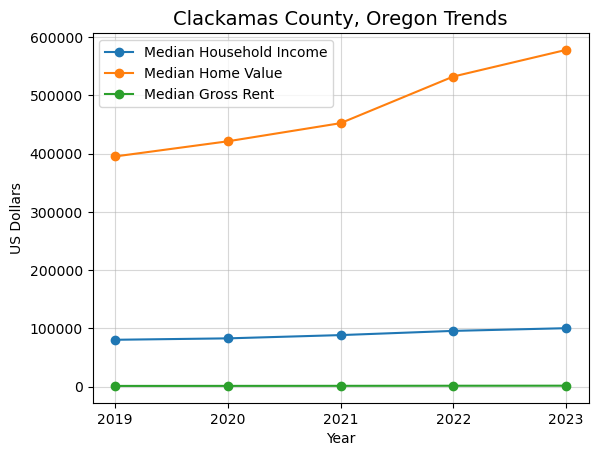

<Figure size 2000x1000 with 0 Axes>

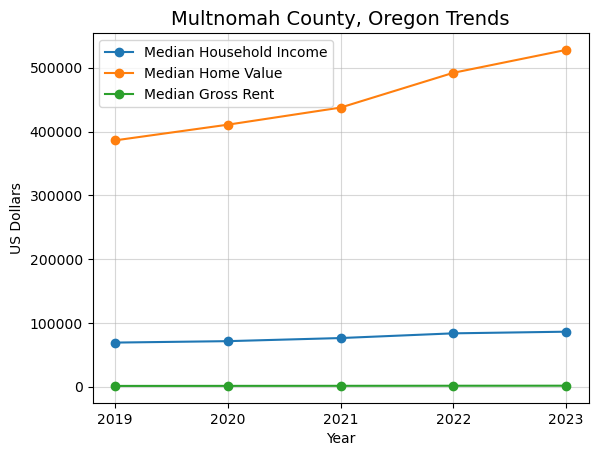

<Figure size 2000x1000 with 0 Axes>

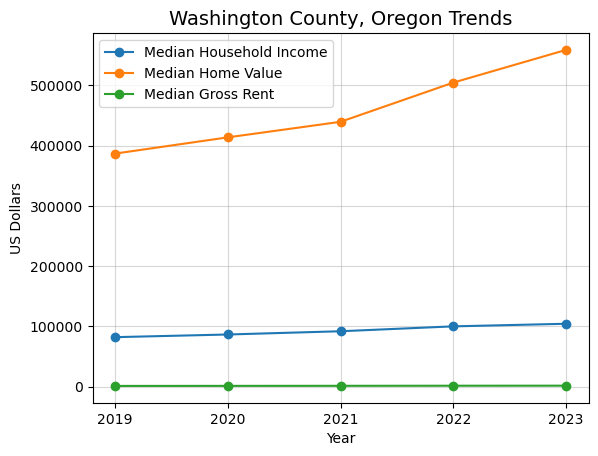

In [19]:

# Loop through each county and create a separate line chart
for county, county_data in converted.groupby("County"):
    plt.figure(figsize=(20, 10))  # Create a new figure for each county
    
    # Plot multiple lines for each county
    county_data.plot(
        x="Year", 
        y=["Median Household Income", "Median Home Value", "Median Gross Rent"], 
        kind="line", 
        marker="o",  # Add markers for readability  
    )

    # Set dynamic title with county name
    plt.title(f"{county} Trends", fontsize=14)
    plt.ylabel("US Dollars")
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.xticks(ticks=county_data["Year"], labels=county_data["Year"].astype(int)) #to remove the decimal place 
    # Show each figure separately
    plt.show()


# Preparing code for graphs

In [20]:
df = converted
df.head()

,County,Median Household Income,Median Home Value,Median Gross Rent,Year
0,"Washington County, Oregon",82215,386600,1359,2019
1,"Clackamas County, Oregon",80484,395100,1295,2019
2,"Multnomah County, Oregon",69176,386200,1237,2019
3,"Clackamas County, Oregon",82911,421100,1356,2020
4,"Multnomah County, Oregon",71425,410800,1309,2020


In [21]:
#Calculate PIR and RIR and add column to df
df["Price-to-Income Ratio"] = df['Median Home Value']/ df['Median Household Income']
df["Rent-to-Income Ratio"] = ((df['Median Gross Rent']*12) / df['Median Household Income']) * 100
df.head()

,County,Median Household Income,Median Home Value,Median Gross Rent,Year,Price-to-Income Ratio,Rent-to-Income Ratio
0,"Washington County, Oregon",82215,386600,1359,2019,4.702305,19.835796
1,"Clackamas County, Oregon",80484,395100,1295,2019,4.909050,19.308185
2,"Multnomah County, Oregon",69176,386200,1237,2019,5.582861,21.458309
3,"Clackamas County, Oregon",82911,421100,1356,2020,5.078940,19.625864
4,"Multnomah County, Oregon",71425,410800,1309,2020,5.751488,21.992300


In [22]:
washington_df = df[df['County']=='Washington County, Oregon']
clackamas_df = df[df['County']=='Clackamas County, Oregon']
multnomah_df = df[df['County']=='Multnomah County, Oregon']


# Affordability Graph 1 : Price to Income Ratio

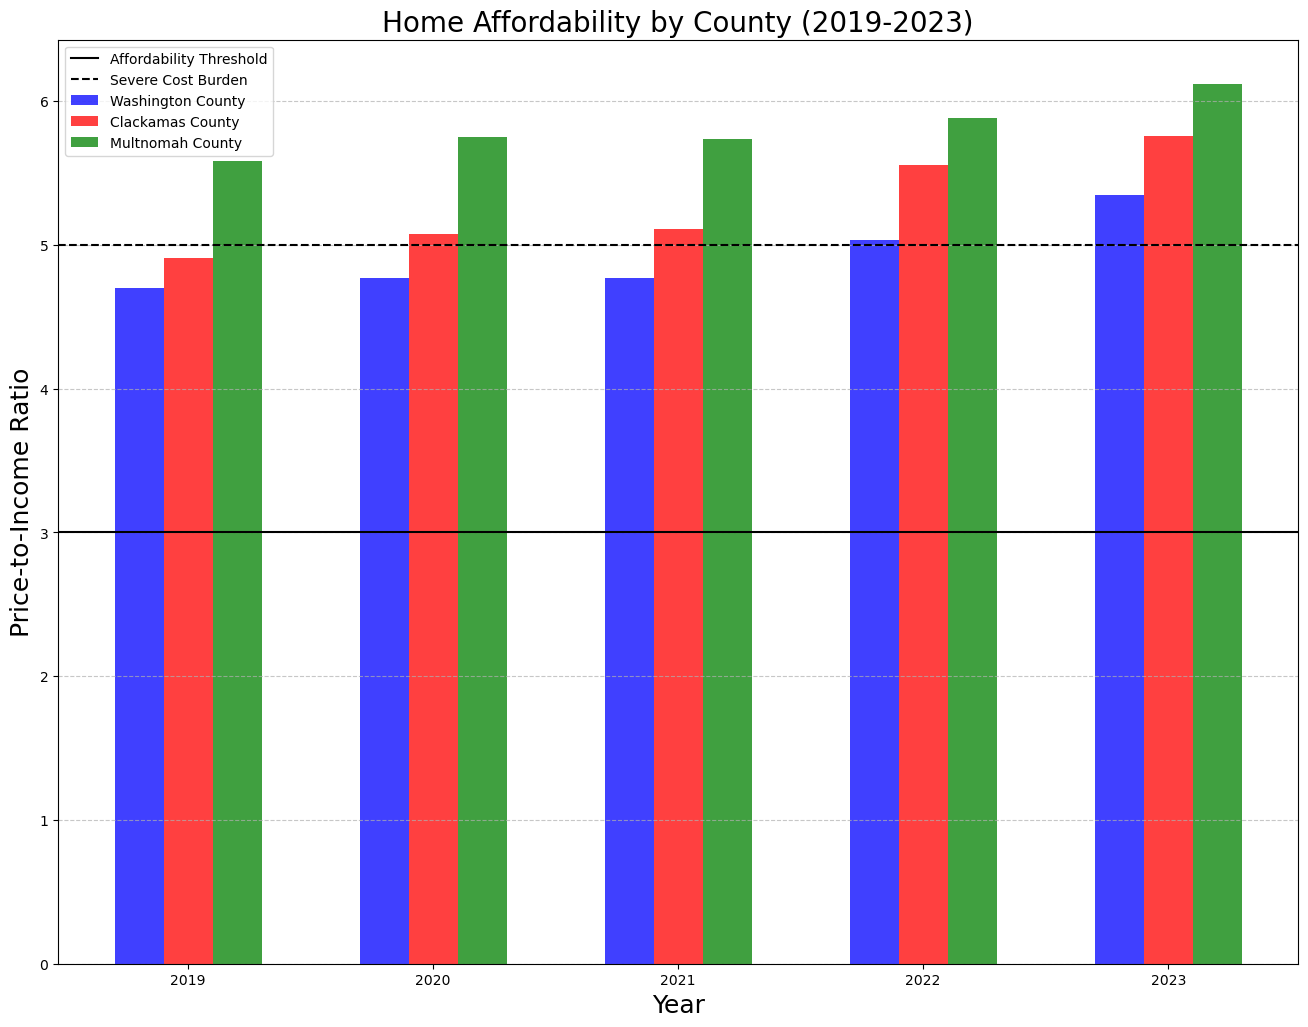

In [23]:
plt.figure(figsize=(16, 12))
plt.bar(washington_df['Year'] - 0.2, washington_df['Price-to-Income Ratio'], width=0.2, color='blue', alpha=.75, label='Washington County')
plt.bar(clackamas_df['Year'], clackamas_df['Price-to-Income Ratio'], width=0.2, color='red', alpha=.75, label='Clackamas County')
plt.bar(multnomah_df['Year'] + 0.2, multnomah_df['Price-to-Income Ratio'], width=0.2, color='green', alpha=.75, label='Multnomah County')

plt.xlabel("Year", fontsize = 18)
plt.ylabel("Price-to-Income Ratio", fontsize = 18)
plt.title("Home Affordability by County (2019-2023)", fontsize = 20)
plt.axhline(y=3, color="black", linestyle="solid", label="Affordability Threshold")
plt.axhline(y=5, color="black", linestyle="dashed", label="Severe Cost Burden")
plt.legend()
plt.grid(axis="y",linestyle="--", alpha=0.7)

plt.show()


# Affordability Graph 2: Rent to Income Ratio

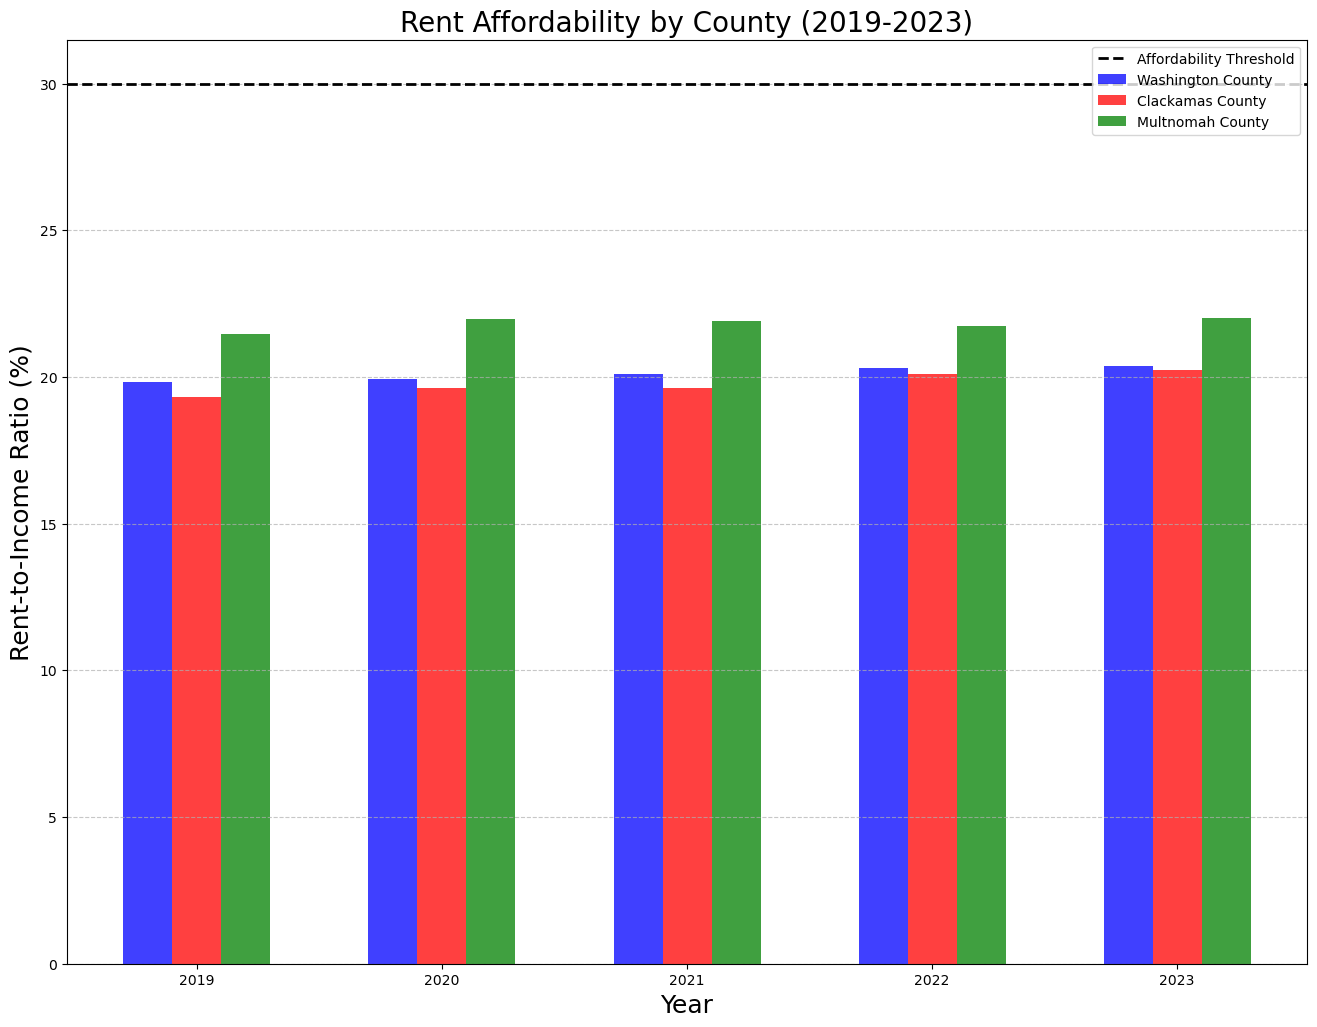

In [36]:
plt.figure(figsize=(16, 12))
plt.bar(washington_df['Year'] - 0.2, washington_df['Rent-to-Income Ratio'], width=0.2, color='blue', alpha=.75, label='Washington County')
plt.bar(clackamas_df['Year'], clackamas_df['Rent-to-Income Ratio'], width=0.2, color='red', alpha=.75, label='Clackamas County')
plt.bar(multnomah_df['Year'] + 0.2, multnomah_df['Rent-to-Income Ratio'], width=0.2, color='green', alpha=.75, label='Multnomah County')

plt.xlabel("Year", fontsize = 18)
plt.ylabel("Rent-to-Income Ratio (%)", fontsize = 18)
plt.title("Rent Affordability by County (2019-2023)", fontsize = 20)
plt.axhline(y=30, color="black", linestyle="dashed", linewidth=2, label="Affordability Threshold")
# plt.axhline(y=50, color="black", linestyle="solid", label="Severe Cost Burden")
plt.legend(loc='upper right')
plt.grid(axis="y",linestyle="--", alpha=0.7)

plt.show()

# Additional Graphs

# Price to Income Ratio by County

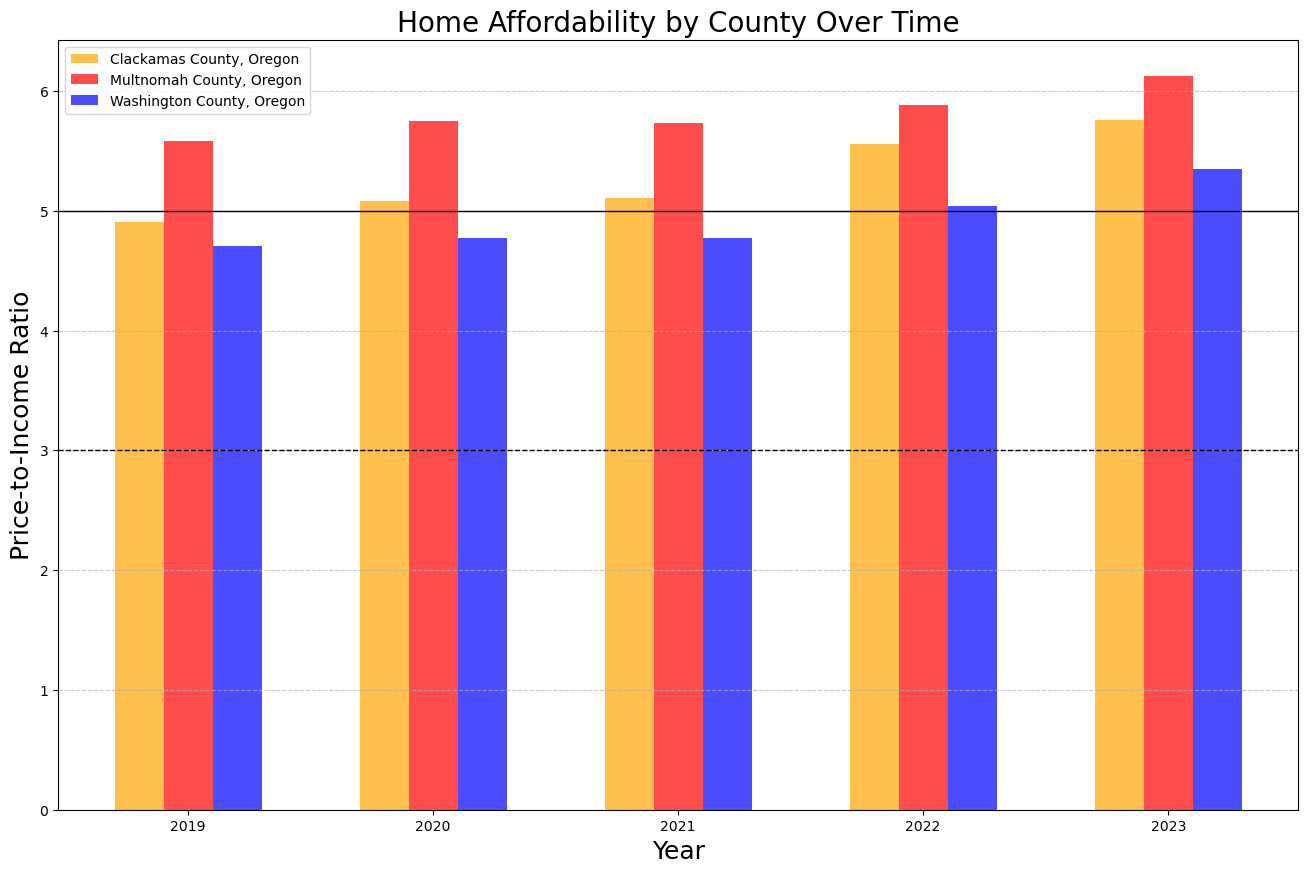

In [25]:
#set variables
income = df['Median Household Income']
home_value = df['Median Home Value']
rent = df['Median Gross Rent']

#Calculate PIR and RIR and add column to df
df["Price-to-Income Ratio"] = home_value/ income
df["Rent-to-Income Ratio"] = ((rent*12) / income) * 100

# Sort data for consistency
df = df.sort_values(by=["County", "Year"])

# Get unique counties and years
counties = df["County"].unique()
years = sorted(df["Year"].unique())

# Set bar width for grouped bars
bar_width = 0.2  
x = np.arange(len(years))  # X-axis positions

# Create figure
fig, ax = plt.subplots(figsize=(16, 10))

# Define colors for each county
colors = ["orange", "red", "blue"]  

# Loop through counties to plot grouped bars
for i, county in enumerate(counties):
    county_data = df[df["County"] == county]
    ax.bar(x + (i * bar_width), county_data["Price-to-Income Ratio"], width=bar_width, label=f"{county}", color=colors[i], alpha=.7)

# Set labels and title
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Price-to-Income Ratio", fontsize=18)
ax.set_title("Home Affordability by County Over Time", fontsize=20)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(years)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.axhline(y=3, color="black", linestyle="dashed", linewidth=1, label="Affordability Threshold (PIR=3)")
plt.axhline(y=5, color="black", linestyle="solid", linewidth=1, label="Severe Cost Burden (PIR=5)")

# Show plot
plt.show()

# Rent to Income Ratio (RIR)

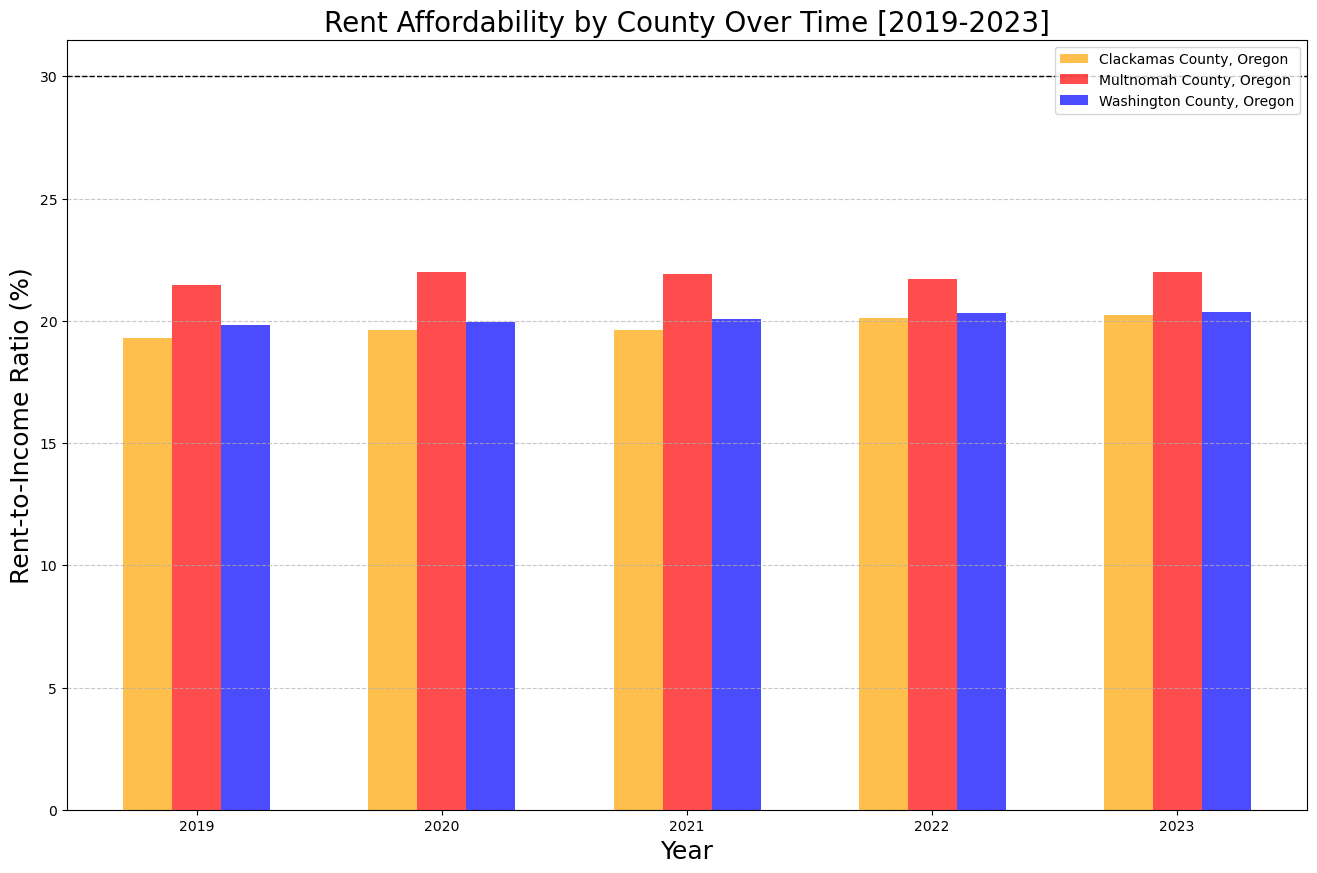

In [26]:
# Set bar width for grouped bars
bar_width = 0.2  
x = np.arange(len(years))  # X-axis positions

# Create figure
fig, ax = plt.subplots(figsize=(16, 10))

# Define colors for each county
colors = ["orange", "red", "blue"]  

# Loop through counties to plot grouped bars
for i, county in enumerate(counties):
    county_data = df[df["County"] == county]
    ax.bar(x + (i * bar_width), county_data["Rent-to-Income Ratio"], width=bar_width, label=f"{county}", color=colors[i], alpha=.7)

# Set labels and title
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Rent-to-Income Ratio (%)", fontsize=18)
ax.set_title("Rent Affordability by County Over Time [2019-2023]", fontsize=20)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(years)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.axhline(y=30, color="black", linestyle="dashed", linewidth=1, label="Affordability Threshold (PIR=3)")
# plt.axhline(y=5, color="black", linestyle="solid", linewidth=1, label="Severe Cost Burden (PIR=5)")

# Show plot
plt.show()

# Comparing Monthly Rent to Monthly Owner Costs

In [27]:
final_df.head()

,,Median Household Income,Median Home Value,Median Gross Rent,Total owner-occupied housing units,Median monthly owner costs with a mortgage,Owners spending 30% of income on housing,Renters spending 30% of income on rent,Owners spending 30%-34.9% of income on costs (with mortgage),Owners spending 35%+ of income on costs (with mortgage),Total Housing Units,Occupied Units,Vacant Units,Owner-occupied Units,Renter-occupied Units,Renters spending 50%+ of income on rent,Owners with a mortgage spending 50%+ of income on housing
County,Year,,,,,,,,,,,,,,,,
"Washington County, Oregon",2019,82215,386600,1359,1693,1972,93,7277,2196,1589,229077,219053,10024,135022,84031,17733,632
"Clackamas County, Oregon",2019,80484,395100,1295,1645,2003,14,3604,2313,1569,167104,157408,9696,111885,45523,11498,850
"Multnomah County, Oregon",2019,69176,386200,1237,1622,1924,71,12512,3688,2173,348029,326229,21800,177889,148340,37548,1502
"Clackamas County, Oregon",2020,82911,421100,1356,1683,2067,213,3734,2032,1511,168828,159330,9498,113015,46315,11400,904
"Multnomah County, Oregon",2020,71425,410800,1309,1682,1989,93,13467,4435,2283,353735,334849,18886,182072,152777,38607,1368


In [28]:
rent_vs_own_df = final_df[["Median Gross Rent", "Median monthly owner costs with a mortgage", "Median Household Income"]]
rent_vs_own_df.head()

,,Median Gross Rent,Median monthly owner costs with a mortgage,Median Household Income
County,Year,,,
"Washington County, Oregon",2019,1359,1972,82215
"Clackamas County, Oregon",2019,1295,2003,80484
"Multnomah County, Oregon",2019,1237,1924,69176
"Clackamas County, Oregon",2020,1356,2067,82911
"Multnomah County, Oregon",2020,1309,1989,71425


In [29]:
rent_vs_own_df.dtypes

Median Gross Rent                             object
Median monthly owner costs with a mortgage    object
Median Household Income                       object
dtype: object

In [30]:
rent_vs_own_conv_df = rent_vs_own_df.astype(int)
rent_vs_own_conv_df.dtypes

Median Gross Rent                             int64
Median monthly owner costs with a mortgage    int64
Median Household Income                       int64
dtype: object

In [31]:
# Convert index back to columns
rent_vs_own_conv_df = rent_vs_own_conv_df.reset_index()  


<Figure size 1000x600 with 0 Axes>

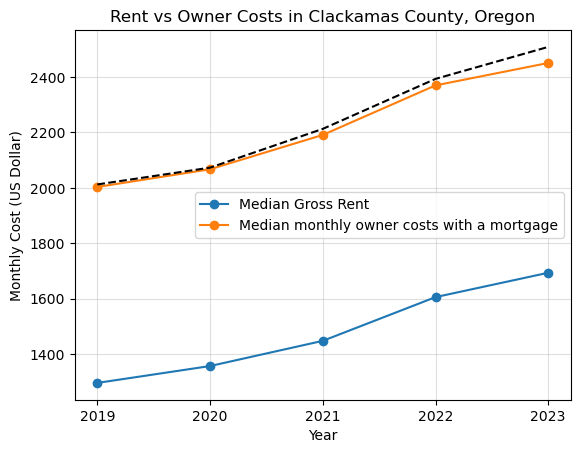

<Figure size 1000x600 with 0 Axes>

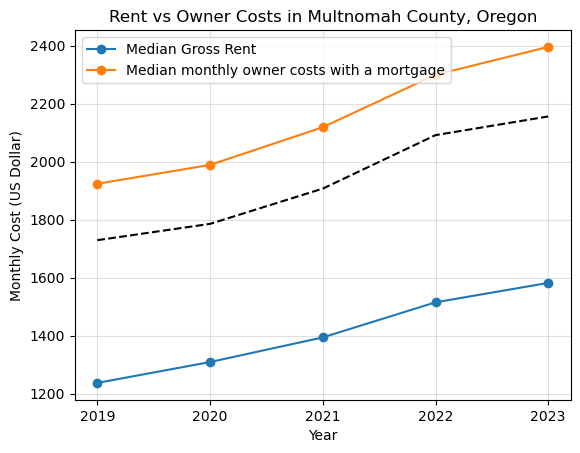

<Figure size 1000x600 with 0 Axes>

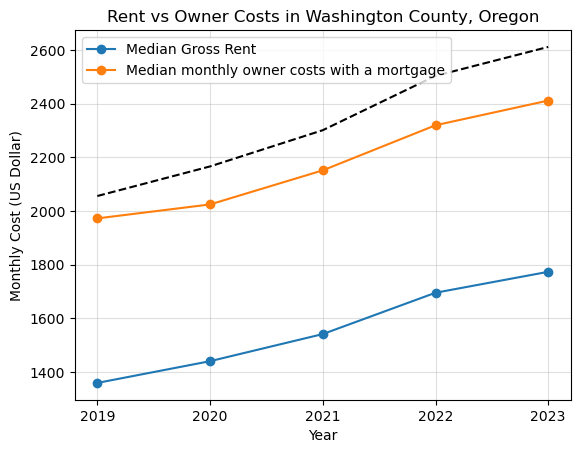

In [32]:
# Loop through each county and create a separate line chart
for county, county_data in rent_vs_own_conv_df.groupby("County"):  # Fix groupby syntax
    plt.figure(figsize=(10, 6))  # Set figure size

    # Plot multiple lines for each county
    county_data.plot(
        x="Year", 
        y=["Median Gross Rent", "Median monthly owner costs with a mortgage"], 
        kind="line", 
        marker="o",
        title=f"Rent vs Owner Costs in {county}"  # Dynamically add county name to title
    )
    # Calculate affordability threshold line
    affordability_threshold = (county_data["Median Household Income"]/12) * .3
    
    # Plot threshold line
    plt.plot(county_data["Year"], affordability_threshold, linestyle="dashed", color="black", label="Affordability Threshold (30% of Income)")
    # Convert Year to Integer for x-axis labels
    plt.xticks(ticks=county_data["Year"], labels=county_data["Year"].astype(int)) #to remove the decimal place 
    plt.ylabel("Monthly Cost (US Dollar)")
    plt.grid(True, alpha=0.4)

# Show all plots
plt.show()
